# Algoritmos Evolucionários e de Enxame

## 1. Fundamentos da Otimização Inspirada na Natureza

### 1.1. O Problema de Otimização

Um `problema de otimização` consiste em encontrar a **melhor** solução a partir de todas as `soluções viáveis`. Pode ser dividido em duas categorias: `otimização discreta` e `otimização contínua`.

#### 1.1.1. Otimização discreta

Quando uma solução (um valor inteiro, uma permutação, grafo, etc.) precisa ser encontrado a partir de um `conjunto contável`. É também referido como problema de `otimização combinatória`.

##### 1.1.1.1. Problema de satisfação de restrição

Podem ser entendidos como:

> Questões matemáticas definidas como um conjunto de objetos cujo `estado` precisa satifazer um número de restrições ou limitações.

É formalmente definido como uma tripla $\langle X,D,C \rangle$, onde:

* $X = \{X_1, ..., X_n\}$ é um conjunto de variáveis;
* $D = \{D_1, ..., D_n\}$ é um conjunto dos respectivos domínios de valores;
* $C = \{C_1, ..., C_m\}$ é um conjunto de restrições (o $C$ vem da palavra em Inglês: *Constraints*).

Cada domínio $D_i$ consiste em um conjunto de valores possíveis, $\{v_1, ..., v_k\}$ para a variável $X_i$. Cada restrição $C_i$ consiste em um par $\langle escopo, rel\rangle$, onde $escopo$ é uma tupla de variáveis que participam da restrição e $rel$ é uma relação que define os valores que essas variáveis podem assumir.

Para não ficar muito abstrato, vejamos alguns exemplos.

* O **Problema das 8 Rainhas**
  * Dispor em um tabuleiro 8 rainhas sem que nenhuma possa atacar a outra. [Vamos tentar?](https://www.brainbashers.com/queens.asp)

<div style="text-align: center;">
    <img src="imagens/a_solution_eight_queens_puzzle.png" alt="Uma solução para o problema da 8 Rainhas">
</div>

* **Coloração de grafos**
  * Qual é a quantidade mínima de cores que pode ser utilizada em um grafo de forma que nenhum par de vértices adjacentes tenham a mesma cor?
    * Essa quantidade mínima é chamada de `numérico cromático`, comumente denotado por $\chi(G)$

<div style="text-align: center;">
    <img src="imagens/Petersen_graph_3-coloring.png" alt="Grafo de Petersen">
</div>

  * O mesmo problema, mas em um contexto real (mapas):

<div style="text-align: center;">
    <img src="imagens/Map_of_United_States_vivid_colors_shown.png" alt="Aplicação do problema em um contexto real">
</div>

##### 1.1.1.2. Problemas de agendamento ótimo

São variados problemas que possuem em comum a tarefa de encontrar o melhor agendamento de acordo com alguma métrica. Por exemplo:

* Agendar um conjunto de $n$ processos para serem executados por um conjunto de $k$ processadores (onde normalmente $n > k$), de forma que todo o processamento dure a menor quantidade de tempo. Um exemplo de complexidade se dá quando a execução de alguns processos dependem dos resultados de outros processos.
* Outro problema complexo é o agendamento ótimo das aulas. São várias turmas, diferentes disciplinas, e poucos professores, os quais possuem horários restritos e preferências por determinadas áreas.

##### 1.1.1.3. O problema da mochila

Dado um conjunto de itens, cada um com um peso e um valor, quais itens escolher de forma que o peso total é menor ou igual a um dado limite, e o valor total é o maior possível?

<div style="text-align: center;">
    <img src="imagens/Knapsack_Problem_Illustration.png" alt="Representação visual para fins de ilustração.">
</div>

Exemplos reais desse tipo de problema:

* Corte de matéria-prima (couro, madeira, pano, etc.) de forma que haja o mínimo possível de desperdício.
* Seleção de ações para formar uma carteira de investimentos.

**Definição formal:** dado um conjunto de $n$ itens numerados de 1 a $n$, cada um com um peso $w_i$ e um valor $v_i$, e a capacidade máximo de peso $W$,

maximizar $\sum_{i=1}^{n}v_ix_i$

sujeito a $\sum_{i=1}^{n}v_ix_i \leq W$ e $x_i \in \{0,1\}$, onde $x_i$ é a quantidade de cópias de um item $i$.

##### 1.1.1.4. O problema do Caixeiro Viajante

Dado um conjunto de cidades, qual seria a rota mais curta para passar em todas as cidades, somente **uma vez**, e voltar para a cidade de origem?

Um conjunto de cidades:

<div style="text-align: center;">
    <img src="imagens/Illustration_of_an_unsolved_travelling_salesman_problem.png" alt="Um conjunto de cidades.">
</div>

Uma solução possível:

<div style="text-align: center;">
    <img src="imagens/GLPK_solution_of_a_travelling_salesman_problem.png" alt="Uma solução.">
</div>

Um exemplo real:

<div style="text-align: center;">
    <img src="imagens/TSP_Deutschland_3.png" alt="Solução de Caixeiro Viajante na Alemanha">
</div>

Essa é uma rota ótima passando pelas 15 maiores cidades da Alemanha. É a rota mais curta entre as 43.589.145.600 possíveis, as quais visitam cada cidade apenas 1 vez.

Uma possível aplicação corriqueira e real:
  * Todo dia de manhã o carro de uma transportadora está cheia de encomendas para entregar. Qual seria a melhor rota para entregar todas as encomendas passando por cada endereço somente 1 vez?

#### 1.1.2. Otimização contínua

Quando um valor ótimo deve ser encontrado a partir de uma **função contínua**. Exemplos: `problemas com restrição` (encontrar valores para variáveis obedecendo uma ou mais restrições; **não confundir com problema de satisfação de restrição**, apesar de serem conceitos praticamente idênticos) e `multimodais` (problemas com duas ou mais soluções ótimas).

Formalmente, a otimização contínua pode ser formulada como segue:

$$
\begin{equation*}
  arg min/max f_{obj}(x)
\end{equation*}
$$

tal que:

$$
\begin{equation*}
  \begin{gather*}
    g_{i}(x) \leq 0 \text{ para } i = 1, ..., n_{g} \\
    h_{j} = 0 \text{ para } j = 1, ..., n_{h} \\
    lb_{k} \leq x_{k} \leq ub_{k} \text{ para } k = 1, ..., n_{x}
  \end{gather*}
\end{equation*}
$$

onde

* $f_{obj}$: é a função objetivo a ser otimizada (minimizada ou maximizada);
* $g_{i}(x)$: é a i-ésima restrição de desigualdade;
  * $n_{g}$: é o número de restrições de desigualdades.
* $h_{j}$: é a j-ésima restrição de igualdade;
  * $n_{h}$: é o número de restrições de igualdade.
* $x_{k}$: k-ésimo elemento do vetor de variáveis;
  * $n_{x}$: é o número de variáveis.
* $lb_{k}$ e $ub_{k}$: limites inferior e superior, respectivamente, da variável $x_{k}$.

##### 1.1.2.1. Aplicações e exemplos

* **Encontrar o valor máximo/mínimo de uma função**: um fazendeiro quer cercar uma campo retangular com 1km de cerca. Quais dimensões maximizam a área cercada?
* **Maximização do lucro:** ajustar os níveis de produção, em função da limitação dos recursos, de modo a aumentar o lucro.
* **Otimização de alocação de recursos:** distribuir recursos entre diferentes tarefas de forma a minimizar os custos e maximizar a eficiência sem extrapolar o orçamento e possíveis outras restrições.
* **Função G01**:

$$
f(x) = 5\sum^{4}_{i=1}x_{i} - 5\sum^{4}_{i=1}x^{2}_{i} - \sum^{13}_{i=5}x_{i}\\
\rule{9cm}{0.5pt}
$$

$$
\text{Restrições}
$$

$$
\begin{align*}
    g_{1}(x) &= 2x_{1} + 2x_{2} + x_{10} + x_{11} - 10 \leq 0\\
    g_{1}(x) &= 2x_{1} + 2x_{2} + x_{10} + x_{11} - 10 \leq 0\\
    g_{2}(x) &= 2x_{1} + 2x_{3} + x_{10} + x_{11} - 10 \leq 0\\
    g_{3}(x) &= 2x_{2} + 2x_{3} + x_{11} + x_{12} - 10 \leq 0\\
    g_{4}(x) &= -8x_{1} + x_{10} \leq 0\\
    g_{5}(x) &= -8x_{2} + x_{11} \leq 0\\
    g_{6}(x) &= -8x_{3} + x_{12} \leq 0\\
    g_{7}(x) &= -2x_{4} - x_{5} + x_{10} \leq 0\\
    g_{8}(x) &= -2x_{6} - x_{7} + x_{11} \leq 0\\
    g_{9}(x) &= -2x_{8} - x_{9} + x_{12} \leq 0\\
\end{align*}
$$

$\qquad\qquad$ onde $0 \leq x_{i} \leq 1 (i = 1,...,9)$, $0 \leq x_{i} \leq 100 (i = 10,11,12)$ e $0 \leq x_{13} \leq 1$. A solução ótima é $f(x^{*}) = -15$.

### 1.2. Conceitos básicos

#### 1.2.1. Função objetivo

É a **representação matemática** do **critério de eficiência adotado no problema de otimização**. É influenciada pelas variáveis de projeto, conhecidas também como variáveis de controle do problema. Esse critério **pode ser representado por uma única função objetivo**, no caso de problemas **mono-objetivos**, ou por **várias funções objetivo**, no caso de problemas **multiobjetivos**. 

Se o critério de eficiência é influenciado por uma única variável, a função é dita **unidimensional**; no caso em que várias variáveis tenham influência sobre o critério, a função objetivo é denominada **multidimensional**. Se a função tem um único **ótimo** (mínimo, ou máximo), é chamada de **unimodal**; quando a função tem vários ótimos, ela é denominada **multimododal**.

#### 1.2.2. Variáveis de decisão/projeto

São os parâmetros variáveis no processo de otimização. São as variáveis em que se deseja determinar um valor dentro de um intervalo predefinido. Uma variável pode ser discreta ou contínua.

#### 1.2.3. Restrições

São equações ou inequações que determinam os limites de viabilidade do projeto, expressando uma condição desejável do comprotamento do sistema. Geralmente as restrições estão relacionadas com a geometria, esforços adminissíveis, recursos disponíveis, custos envolvidos, etc.

#### 1.2.4. Espaço de busca

É a região do domínio que satisfaz as restrições do problema. É também conhecido como domínio viável do problema. É delimitado pelas restrições impostas ao sistema e pelo intervalo de variação das variáveis do projeto.

<div style="text-align: center;">
    <img src="imagens/The-search-space-of-benchmark-optimization-functions.png" alt="Espaços de busca.">
</div>

#### 1.2.5. Ponto ótimo

É o vetor de variáveis de projeto que otimiza a função objetivo e satisfaz as restrições do problema.

<div style="text-align: center;">
    <img src="imagens/espaco-busca.png" alt="Espaço de busca com ótimos global e local">
</div>

Há uma diferença entre `ótimo global` e `ótimo local`. O `ótimo global` se refere à(s) melhor(es) solução(ões) existente no espaço de busca. Já um `ótimo local` trata-se de uma solução que é melhor do que todas as suas vizinhas em um espaço de busca.

#### 1.2.6. Otimização multiobjetivo

É o caso onde se procura obter a "melhor resposta" em mais de um aspecto do sistema e, consequentemente, atender a dois ou mais objetivos simultaneamente. É comum que os objetivos sejam conflitantes, ou seja, buscar a melhor resposta do problema em relação a um dado objetivo pode representar uma resposta não tão boa em relação a outros objetivos.Exemplo: dirigir o mais rápido possível em um destino, mantendo a maior segurança possível. Quanto mais rápido se dirige, menor é a segurança do motorista e passageiros. Por outro lado, prezar pela segurança impede o aumento da velocidade.

Portanto, não existe uma única solução ótima, e sim um conjunto de soluções. Tais soluções são ditas ótimas porque não existem outras melhores do que elas no espaço de buscas. São também conhecidas como soluções **não dominadas**.

O desafio na otimização multiobjetivo é encontrar um conjunto de soluções não dominadas para que o projetista possa escolher, dentre elas, a que melhor possa atender suas necessitadas. O conjunto de todas as soluções **não dominadas** é chamada de **Fronteira de Pareto**.

[Exemplos](https://en.wikipedia.org/wiki/Test_functions_for_optimization#Test_functions_for_multi-objective_optimization)

### 1.3. Algoritmos de busca e otimização

São os algoritmos utilizados para encontrar a melhor solução a partir de um espaço de busca. Os mais simples são chamados de algoritmos de `busca sem informação`. O mais simples deles é o algoritmo de *força bruta*, ou seja, a avaliação de cada solução individualmente, até encontrar a melhor.

Outros exemplos de `busca sem informação`, porém mais inteligentes que o da *força bruta*, são aqueles que percorrem soluções organizadas em uma `árvore` ou `grafo`:

* **[BFS](https://en.wikipedia.org/wiki/Breadth-first_search):** *Breadth First Search* ou Busca em Largura.
  
<div style="text-align: center;">
    <img src="imagens/Animated_BFS.gif" alt="BFS">
</div>

* **[DFS](https://en.wikipedia.org/wiki/Depth-first_search):** *Depth First Search* ou Busca em Profundidade.

Se o espaço de busca contiver 100 soluções, um computador pode verificar todas elas quase instantaneamente (um ser humano levaria alguns minutos). E quando o espaço de busca possui 1 milhão de soluções?

<details>
    <summary>Ou 14 milhões e 605?</summary>
    <div style="text-align: center;">
        <img src="imagens/dr-strange-infinity-war.jpg" alt="Espaço de busca com ótimos global e local">
    </div>
</details>


#### 1.3.1. Busca com informação

Os algoritmos de `busca com informação`, ou `busca informada`, usam conhecimento específico do problema. Os mais simples são do tipo *best-first search*, ou *busca pelo melhor primeiro*. O "melhor" costuma ser um novo `estado`, ou a solução vizinha, que retorne o menor valor de uma função de custo $f(n)$.

Essa função, em muitos casos, passa a ser definida em termos de uma `função heurística` $h(n)$. Uma `função heurística` é uma técnica planejada para a resolução de problemas mais rapidamente do que métodos clássicos. É uma forma de inserir **conhecimento adicional** para o algoritmo de busca. Por exemplo, se você estiver procurando a rota mais curta entre Teresina e Luís Correia, você vai evitar todos os caminhos que levam para o sul do Estado.

Neste ponto, onde temos uma `função de custo` e uma `função heurística`, é possível citar dois dos principais algoritmos: `Busca Gulosa` e `A*`. A `Busca Gulosa` costuma expandir seus `estados` para aqueles cujo valor de $h(n)$ são os menores. Por sua vez, o `A*` considera uma função de custo $g(n)$ e a heurística $h(n)$, de forma que $f(n) = g(n) + h(n)$.

Vejamos um [vídeo comparando A*, BFS, DFS e o algoritmo de Dijkstra](https://www.youtube.com/watch?v=aW9kZcJx64o).

#### 1.3.2. Metaheurística

Pode ser entendida como uma heurística projetada para encontrar, gerar, ajustar, ou selecionar uma heurística que pode prover uma solução suficientemente boa para um `problema de otimização`, ou ainda problemas de `aprendizagem de máquina`. Algumas das propriedades presentes na maioria dos algoritmos metaheurísticos são:

* Consiste em uma estratégia para guiar o processo de busca.
* Tem por objetivo explorar eficientemente o `espaço de busca` para encontrar soluções ótimas, ou quase ótimas.
* Costumam conter mecanismos que os previne de ficar presos em ótimos locais.

##### 1.3.2.1. Classificação dos algoritmos

<div style="text-align: center;">
    <img src="imagens/Metaheuristics_classification.png" alt="Classificação de metaheurísticas">
</div>

Nesse diagrama estão presentes vários dos principais algoritmos, classificados de acordo com alguma característica específica. O escopo do nosso minicurso é sobre os `algoritmos bio-inspirados`.

#### 1.3.3. Algoritmos bio-inspirados

Esses algoritmos podem ser separados em duas principais categorias: `algoritmos evolucionários` e `algoritmos de enxame`. Os primeiros foram inspirados na **evolução natural das espécies**, enquanto os últimos têm por inspiração o comportamento de determinados coletivos de animais. Ao mesmo tempo, essas duas vertentes possuem vários conceitos comuns.

* **População**/**Enxame**: consiste em um conjunto de soluções. A quantidade de soluções vai depender do custo computacional do algoritmo e do poder computacional da máquina onde o algoritmo será executado.
* **Indivíduo**/**Partícula**: o nome que se dá a cada solução única.
* **Função de aptidão** ou ***fitness***: função para medir o quão boa é cada solução, de acordo com a `função objetivo`.
* **Gerações**/**Iterações**: consistem nos novos conjuntos de soluções após alguma computação. Nos `algoritmos evolucionários`, uma nova geração significa um novo conjunto de indivíduos, os quais foram gerados a partir do conjunto de soluções anterior. Nos `algoritmos de enxame`, a cada iteração as soluções sofrem modificações.
* **Critério de parada**: uma determinada condição para fazer com que o algoritmo encerre sua execução. Costuam ser: (1) uma quantidade predefinida de gerações ou iterações; ou (2) uma quantidade de gerações ou iterações sem mudança significativa no valor da `função de aptidão` da melhor solução.

## 2. Algoritmo Genético (AG)

Em um `algoritmo genético` uma `população` de `soluções candidatas` (também chamadas de `indivíduos`) a um `problema de otimização` passa pelo processo de evolução para melhores soluções. A evolução ocorre a partir de `operadores genéticos`.

Cada indivíduo possui um conjunto de propriedades, chamado de `cromossomo`, e cada propriedade é chamada de `gene`.

<div style="text-align: center;">
    <img src="imagens/Genetic-Algorithm-Illustrated.jpg" alt="Alguns termos técnicos do Algoritmo Genético">
</div>

### 2.1. Ciclo do AG

O AG possui as seguintes fases em seu ciclo:

1. Inicialização.
2. Seleção.
3. Recombinação e mutação.
4. Substituição de gerações.

#### 2.1.1. Inicialização

A inicialização do algoritmo consiste na seleção de $n$ indivíduos aleatórios, onde $n$ é definido pelo usuário, e $n = 50$ é bastante comum. Dependendo do poder computacional disponível, ou da complexidade da representação das soluções, $n$ costuma ser variado entre 20 e 200.

#### 2.1.2. Seleção

A **seleção**, ou `operador de seleção`,  consiste em uma estratégia de selecionar `indivíduos` a partir da `população`, no intuito de recombiná-los para gerar novos e melhores `indivíduos`.

As principais estratégias são: **método da roleta**, **rank**, **torneio** e **truncagem**.

##### 2.1.2.1. Roleta

Primeiro é calculada a `função de aptidão` (*fitness*) de todos os `indivíduos`. Em seguida é feita uma soma de todos esses valores, e os indivíduos passam a ser escolhidos de forma aleatória e probabilística.

<div style="text-align: center;">
    <img src="imagens/Roleta.PNG" alt="Exemplo de uma roleta.">
</div>

Quanto melhor for uma solução, mais ela terá contribuído para o valor total das aptidões e, portanto, terá um maior espaço na roleta. A probabilidade de seleção de cada `indivíduo` ($p_i$) é calculado da seguinte forma:

$$p_i = \dfrac{f_i}{\sum_{k=1}^{n}f_k}$$

onde:

* $f_i$ é o *fitness* do `indivíduo` $i$;
* $n$ é o tamanho da `população`.

Se houver um `indivíduo` muito melhor do que os demais, ele acaba se tornando dominante, sendo selecionado muitas vezes e fazendo com que a próxima `geração` tenha menor diversidade de genes. Como consequência, o algoritmo **converge** mais rápido, possivelmente ficando preso em um `ótimo local`.

##### 2.1.2.2. Rank

É uma variação da roleta. Aqui, o melhor `indivíduo` recebe o rank $n$, enquanto o pior recebe rank 1. A `seleção` continua sendo feita de forma aleatória, e o melhor `indivíduo` continua tendo maior probabilidade de ser selecionado, porém, com peso bastante reduzido. A probabilidade de um `indivíduo` $i$ ser selecionado é:

$$p_i = \dfrac{rank(i)}{n \times (n - 1)}$$

##### 2.1.2.3. Torneio

Neste caso, um conjunto de $k$ `indivíduos` é escolhido aleatoriamente da `população`, e o melhor é selecionado.

##### 2.1.2.4. Truncagem

Os `indivíduos` são ordenados de acordo com seu valor de *fitness*. Então um limite (comumente entre 50% e 10%) é definido pelo usuário e somente os `indivíduos` dentro desse limite são selecionados.

#### 2.1.3. Recombinação e mutação

É a estratégia, ou `operador de recombinação`, responsável por gerar uma ou mais `proles` a partir dos `pais` que foram selecionados.

A estratégia vai depender bastante dos valores dos genes. Nas versões mais simples do `algoritmo genético`, cada gene é um valor binário. Nesses casos, a `recombinação` (também bastante conhecida como *crossover*) costuma ser `k-point crossover`, onde $k$ é a quantidade de pontos de corte. A seguir, exemplos de `recombinação` com 1 e 2 pontos de corte.

<div style="text-align: center;">
    <img src="imagens/OnePointCrossover.png" alt="Recombinação com 1 ponto de corte.">
</div>

<div style="text-align: center;">
    <img src="imagens/TwoPointCrossover.png" alt="Recombinação com 2 pontos de corte.">
</div>

Para cada valor de gene (como inteiros, reais, ou permutações) existe uma estratégia apropriada.

Após a `recombinação`, é executado o `operador de mutação`, responsável por gerar uma modificação aleatória em algum `gene` aleatório. O valor dos genes também influencia na execução da mutação.

<div style="text-align: center;">
    <img src="imagens/Mutation-Illustrated.jpg" alt="Exemplo de mutação.">
</div>

#### 2.1.4. Substituição de gerações

Consiste na estratégia que vai definir quais `indivíduos` comporão a próxima geração.

O mais comum é a **substituição completa**. Durante a recombinação, são geradas $n$ proles a partir dos pais selecionados. A geração atual é, então, completamente substituída pela nova geração.

Outra estratégia bastante conhecida e utilizada é chamada de `elitismo`. Essa estratégia consiste em selecionar alguns dos melhores indivíduos da geração atual para permanecerem na geração seguinte. Supondo que as $5$ melhores soluções devam continuar, as $5$ piores `proles` são descartadas.

### 2.2. Outros algoritmos evolucionários

Apesar de bem menos citados e explorados, existem outros algoritmos evolucionários:

* [Programação Genética](https://en.wikipedia.org/wiki/Genetic_programming).
* [Programação Evolucionária](https://en.wikipedia.org/wiki/Evolutionary_programming).
* [Estratégia Evolutiva](https://en.wikipedia.org/wiki/Evolution_strategy).
* [Evolução Diferencial](https://en.wikipedia.org/wiki/Differential_evolution).
* [Neuroevolução](https://en.wikipedia.org/wiki/Neuroevolution).

### 2.3. Vídeos

* [What is a Genetic Algorithm?](https://www.youtube.com/watch?v=1i8muvzZkPw)
* [Genetic Algorithms Explained By Example](https://www.youtube.com/watch?v=uQj5UNhCPuo)

<div style="text-align: center;">
    <img src="imagens/Estimation_of_Distribution_Algorithm_animation.gif" alt="AG em funcionamento.">
</div>

## 3. Algoritmos de Enxame

Como referido anteriormente, esse tipo de algoritmos é inspirado na `inteligência de enxames`, ou seja, no comportamento coletivo, descentralizado e auto-organizado de animais.

Os dois principais algoritmos:

* **[ACO](https://en.wikipedia.org/wiki/Ant_colony_optimization_algorithms)**: *Ant Colony Optimizarion* - Otimização de Colônia de Formigas.
* **[PSO](https://en.wikipedia.org/wiki/Particle_swarm_optimization)**: *Particle Swarm Optimization* - Otimização por Enxame de Partículas.

### 3.1. ACO

O algoritmo se baseia na comunicação entre formigas que ocorre a partir de uma trilha de `feromônio`, um sinal químico indicando, por exemplo, uma fonte de comida. Quanto mais formigas passam por uma trilha, mais forte fica o `feromônio` naquela trilha. Essa trilha é representada no ACO a partir de valores armazenados em uma `matriz de feromônio`.

Cada `formiga artificial` representa uma solução potencial a um problema, o qual costuma ser um problema de encontrar a melhor rota. O algoritmo funciona da seguinte forma:

1. **Inicialização**: um conjunto aleatório de formigas é criado, e elas passam a explorar caminhos de forma aleatória.
2. **Feromônio e informação heurística**: o caminho de cada formiga é influenciado por dois principais fatores: `nível de feromônio` (que indica o quão bom, ou desejável, é uma solução, baseada em iterações anteriores) e uma `informação heurística` (a distância entre duas cidades, por exemplo). Valores maiores de `feromônio` aumenta a probabilidade de um caminho ser escolhido.
3. **Atualização dos feromônios**: após todas as formigas terem completado seus caminhos, os valores de `feromônio` são atualizados. Rotas que foram parte de soluções melhores ficam com `feromônio` mais forte, enquanto outras rotas não tão boas têm parte de seu `feromônio` evaporado, ficando mais fraco.
4. **Convergência**: Após diversas iterações, a `matriz de feromônio` passa a refletir a(s) melhor(es) solução(ões).

#### 3.1.1. Fórmulas

A parte matemática que é implementada.

##### 3.1.1.1. Escolha de aresta

Para escolher a próxima aresta uma formiga considerará o comprimento de cada aresta disponível a partir de sua posição atual, como também o nível de feromônio correspondente. A cada passo do algoritmo, cada formiga se move do estado $x$ para o estado $y$. Ou seja, cada formita $k$ computa um conjunto $A_k(x)$ de expansões viáveis para o seu estado atual em cada iteração, e escolhe uma delas de forma probabilística.

Para a formiga $k$, a probabilidade $p_{xy}^k$ de se mover do estado $x$ para o estado $y$ depende de dois valores: a *atratividade* $\eta_{xy}$, calculada a partir de alguma heurística, e o nível de feromônio $\tau_{xy}$. Ou seja:

$$p_{xy}^k = \dfrac{(\tau_{xy}^{\alpha})(\eta_{xy}^{\beta})}{\sum_{z \in permitido_y}(\tau_{xz}^{\alpha})(\eta_{xz}^{\beta})}$$

onde

* $\tau_{xy}$ é a quantidade de feromônio depositada para a transição de $x$ para $y$.
* $\alpha \geq 0$ é um parâmetro de controle da influência de $\tau_{xy}$.
* $\eta_{xy}$ é a atratividade da transição $xy$, normalmente $1/d_{xy}$, onde $d$ é a distância.
* $\beta \geq 1$ é um parâmetro de controle da influência de $\eta_{xy}$.
* $\tau_{xz}$ e $\eta_{xz}$ representam o feromônio e atratividade de outras possíveis transições.

**Atualização do feromônio**:

$$\tau_{xy} \leftarrow (1 - \rho)\tau_{xy} + \sum_{k}^{m}\Delta\tau_{xy}^{k}$$

onde

* $\rho$ é o coeficiente de evaporação do feromônio.
* $m$ é a quantidade de formigas.
* $\Delta\tau_{xy}^{k}$ é a quantidade de feromônio depositada pela $k-ésima$ formiga, e pode ser definida por

$$\Delta\tau_{xy}^{k} = \begin{cases}
                            Q/L_k & \text{se a formiga} k \text{passa por} xy\\
                            0     & \text{senão}
                        \end{cases}$$

onde $L_k$ é o custo da $k-ésima$ formiga passar pela transição (normalmente o comprimento), e $Q$ é uma constante.

<div style="text-align: center;">
    <img src="imagens/Aco_TSP.png" alt="ACO TSP França.">
</div>

<div style="text-align: center;">
    <img src="imagens/Ant_Colony_Algorihm_applied_to_the_Travelling_Salesman_Problem.gif" alt="ACO gif.">
</div>

#### 3.1.2. Vídeos

* [C++ Ants Simulation - Walls](https://www.youtube.com/watch?v=YBQtbbz5s5M)
* [C++ Ants Simulation 2, Path optimization](https://www.youtube.com/watch?v=emRXBr5JvoY&t=80s)
* [C++ Ants Simulation 3, Maze](https://www.youtube.com/watch?v=V1GeNm2D2DU)

### 3.2. PSO

É comumente referido como sendo a simulação de uma revoada de pássaros, ou um cardume. Cada solução, aqui chamada de `partícula`, possui os seguintes atributos:

* **Velocidade**: um vetor que guia o movimento da `partícula`.
* **Posição**: a posição atual no `espaço de busca`, ou seja, uma solução potencial.
* ***pbest***: a melhor posição que a partícula encontrou até então.
* ***gbest***: a melhor posição encontrada considerando todas as `partículas`.
* **Inércia**: um peso $\omega$ que controla a influência da velocidade anterior na velocidade atual.
* **Componente cognitivo**: um parâmetro $c_1$ que controla a influência do *pbest* na velocidade atual.
* **Componente social**: um parâmetro $c_2$ que controla a influência do *gbest* na velocidade atual.

A posição da `partícula` $i$ no tempo $t$ é denotada por $X^i(t)$, a qual consiste em uma coordenada: $X^i(t) = (x^i(t), y^i(t))$ - supondo 2 dimensões. A **velocidade** da `partícula` $i$ no tempo $t$ é denotada como $V^i(t) = (v_x^i(t), v_y^i(t))$. A nova posição da partícula é calculada da seguinte forma:

$$X^i(t+1) = X^i(t) + V^i(t+1)$$

E a nova velocidade é calculada da seguinte forma:

$$V^i(t+1) = wV^i(t) + c_1r_1(pbest^i - X^i(t)) + c_2r_2(gbest - X^i(t))$$

onde $r_1$ e $r_2$ são valores aleatórios entre 0 e 1

Seu funcionamento básico é da seguinte forma:

1. **Inicialização**: um conjunto de partículas aleatórias é criada, e suas aptidões são calculadas.
2. **Movimento**: cada partícula ajusta sua posição no `espaço de busca`.
3. **Critério de parada**.

<div style="text-align: center;">
    <img src="imagens/ParticleSwarmArrowsAnimation.gif" alt="PSO gif.">
</div>

#### 3.2.1. Vídeos

* [Particle Swarm Optimization animation](https://www.youtube.com/watch?v=L3GuWaUgszs)
* [How Swarms Solve Impossible Problems](https://www.youtube.com/watch?v=bFbJhl9W89Q)

### 3.3. Outros algoritmos de enxame

* [ABC](https://en.wikipedia.org/wiki/Artificial_bee_colony_algorithm): *Artificial Bee Colony*.
* *Cuckoo Search*.
* *Grey Wolf Optmizer* (GWO).
* *Whale Optmization Algorithm* (WOA).
* *Firefly Algorithm* (FA).
* *Bat Algorithm* (BA).

Meio que perderam a linha: [lista de metaheurísticas baseadas em metáforas](https://en.wikipedia.org/wiki/List_of_metaphor-based_metaheuristics).

## 4. Implementações

Agora simmmmmmmm!

Vamos escolher alguns algoritmos para implementar agora! (Quem sabe faz ao vivo meuuuu!)

1. Otimizar a seguinte função matemática: $f(x) = x^2 - 4x + 5$, em que $x \in [-5.0, 5.0]$.
2. Problema da mochila.
3. Caixeiro viajante.

---

Best path: [18, np.int64(10), np.int64(2), np.int64(13), np.int64(3), np.int64(17), np.int64(16), np.int64(5), np.int64(7), np.int64(15), np.int64(6), np.int64(14), np.int64(9), np.int64(8), np.int64(0), np.int64(1), np.int64(11), np.int64(19), np.int64(4), np.int64(12), 18]
Total distance: 192


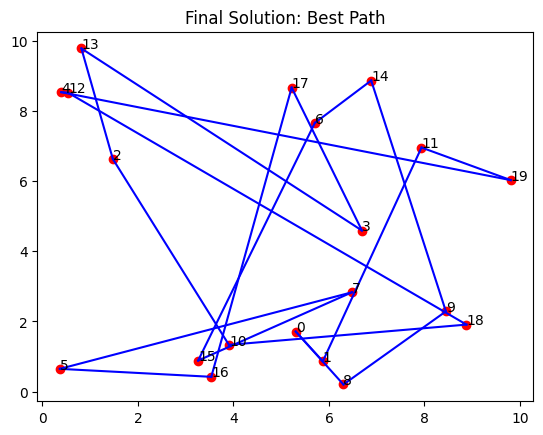

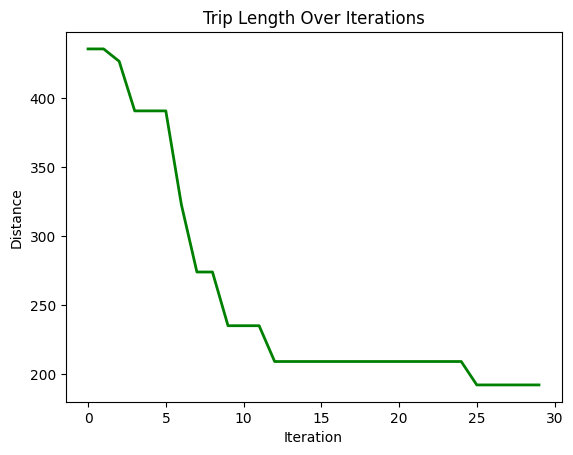

In [7]:
# FONTE: https://www.datacamp.com/tutorial/swarm-intelligence

import numpy as np
import matplotlib.pyplot as plt

# Graph class represents the environment where ants will travel
class Graph:
    def __init__(self, distances):
        # Initialize the graph with a distance matrix (distances between nodes)
        self.distances = distances
        self.num_nodes = len(distances)  # Number of nodes (cities)
        # Initialize pheromones for each path between nodes (same size as distances)
        self.pheromones = np.ones_like(distances, dtype=float)  # Start with equal pheromones

# Ant class represents an individual ant that travels across the graph
class Ant:
    def __init__(self, graph):
        self.graph = graph
        # Choose a random starting node for the ant
        self.current_node = np.random.randint(graph.num_nodes)
        self.path = [self.current_node]  # Start path with the initial node
        self.total_distance = 0  # Start with zero distance traveled
        # Unvisited nodes are all nodes except the starting one
        self.unvisited_nodes = set(range(graph.num_nodes)) - {self.current_node}

    # Select the next node for the ant to travel to, based on pheromones and distances
    def select_next_node(self):
        # Initialize an array to store the probability for each node
        probabilities = np.zeros(self.graph.num_nodes)
        # For each unvisited node, calculate the probability based on pheromones and distances
        for node in self.unvisited_nodes:
            if self.graph.distances[self.current_node][node] > 0:  # Only consider reachable nodes
                # The more pheromones and the shorter the distance, the more likely the node will be chosen
                probabilities[node] = (self.graph.pheromones[self.current_node][node] ** 2 /
                                       self.graph.distances[self.current_node][node])
        probabilities /= probabilities.sum()  # Normalize the probabilities to sum to 1
        # Choose the next node based on the calculated probabilities
        next_node = np.random.choice(range(self.graph.num_nodes), p=probabilities)
        return next_node

    # Move to the next node and update the ant's path
    def move(self):
        next_node = self.select_next_node()  # Pick the next node
        self.path.append(next_node)  # Add it to the path
        # Add the distance between the current node and the next node to the total distance
        self.total_distance += self.graph.distances[self.current_node][next_node]
        self.current_node = next_node  # Update the current node to the next node
        self.unvisited_nodes.remove(next_node)  # Mark the next node as visited

    # Complete the path by visiting all nodes and returning to the starting node
    def complete_path(self):
        while self.unvisited_nodes:  # While there are still unvisited nodes
            self.move()  # Keep moving to the next node
        # After visiting all nodes, return to the starting node to complete the cycle
        self.total_distance += self.graph.distances[self.current_node][self.path[0]]
        self.path.append(self.path[0])  # Add the starting node to the end of the path

# ACO (Ant Colony Optimization) class runs the algorithm to find the best path
class ACO:
    def __init__(self, graph, num_ants, num_iterations, decay=0.5, alpha=1.0):
        self.graph = graph
        self.num_ants = num_ants  # Number of ants in each iteration
        self.num_iterations = num_iterations  # Number of iterations
        self.decay = decay  # Rate at which pheromones evaporate
        self.alpha = alpha  # Strength of pheromone update
        self.best_distance_history = []  # Store the best distance found in each iteration

    # Main function to run the ACO algorithm
    def run(self):
        best_path = None
        best_distance = np.inf  # Start with a very large number for comparison
        # Run the algorithm for the specified number of iterations
        for _ in range(self.num_iterations):
            ants = [Ant(self.graph) for _ in range(self.num_ants)]  # Create a group of ants
            for ant in ants:
                ant.complete_path()  # Let each ant complete its path
                # If the current ant's path is shorter than the best one found so far, update the best path
                if ant.total_distance < best_distance:
                    best_path = ant.path
                    best_distance = ant.total_distance
            self.update_pheromones(ants)  # Update pheromones based on the ants' paths
            self.best_distance_history.append(best_distance)  # Save the best distance for each iteration
        return best_path, best_distance

    # Update the pheromones on the paths after all ants have completed their trips
    def update_pheromones(self, ants):
        self.graph.pheromones *= self.decay  # Reduce pheromones on all paths (evaporation)
        # For each ant, increase pheromones on the paths they took, based on how good their path was
        for ant in ants:
            for i in range(len(ant.path) - 1):
                from_node = ant.path[i]
                to_node = ant.path[i + 1]
                # Update the pheromones inversely proportional to the total distance traveled by the ant
                self.graph.pheromones[from_node][to_node] += self.alpha / ant.total_distance

# Generate random distances between nodes (cities) for a 20-node graph
num_nodes = 20
distances = np.random.randint(1, 100, size=(num_nodes, num_nodes))  # Random distances between 1 and 100
np.fill_diagonal(distances, 0)  # Distance from a node to itself is 0
graph = Graph(distances)  # Create the graph with the random distances
aco = ACO(graph, num_ants=10, num_iterations=30)  # Initialize ACO with 10 ants and 30 iterations
best_path, best_distance = aco.run()  # Run the ACO algorithm to find the best path

# Print the best path found and the total distance
print(f"Best path: {best_path}")
print(f"Total distance: {best_distance}")

# Plotting the final solution (first plot) - Shows the final path found by the ants
def plot_final_solution(distances, path):
    num_nodes = len(distances)
    # Generate random coordinates for the nodes to visualize them on a 2D plane
    coordinates = np.random.rand(num_nodes, 2) * 10
    # Plot the nodes (cities) as red points
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='red')
    # Label each node with its index number
    for i in range(num_nodes):
        plt.text(coordinates[i, 0], coordinates[i, 1], f"{i}", fontsize=10)
    # Plot the path (edges) connecting the nodes, showing the best path found
    for i in range(len(path) - 1):
        start, end = path[i], path[i + 1]
        plt.plot([coordinates[start, 0], coordinates[end, 0]], 
                 [coordinates[start, 1], coordinates[end, 1]], 
                 'blue', linewidth=1.5)
    plt.title("Final Solution: Best Path")
    plt.show()

# Plotting the distance over iterations (second plot) - Shows how the path length improves over time
def plot_distance_over_iterations(best_distance_history):
    # Plot the best distance found in each iteration (should decrease over time)
    plt.plot(best_distance_history, color='green', linewidth=2)
    plt.title("Trip Length Over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Distance")
    plt.show()

# Call the plotting functions to display the results
plot_final_solution(distances, best_path)
plot_distance_over_iterations(aco.best_distance_history)

PSO found best solution at f([3.18541756 3.12972478])=-1.8083516042208303
Global optimal at f([np.float64(3.1818181818181817), np.float64(3.131313131313131)])=-1.8082706615747688


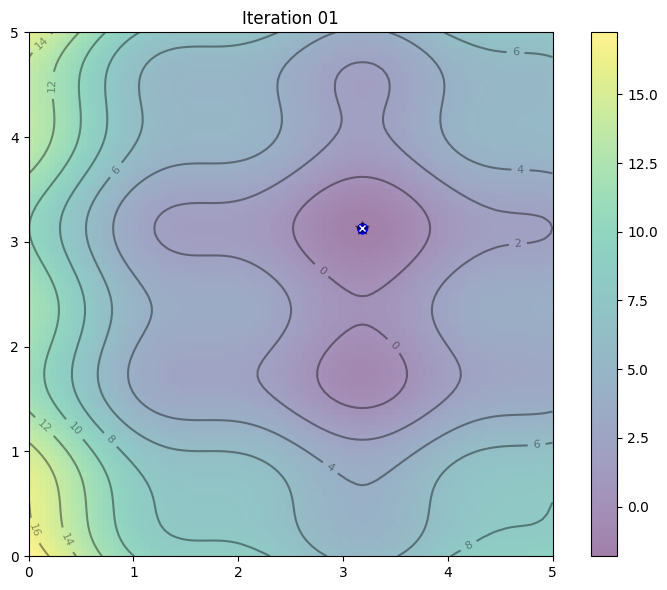

In [ ]:
# FONTE: https://machinelearningmastery.com/a-gentle-introduction-to-particle-swarm-optimization

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def f(x,y):
    "Objective function"
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
    
# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)

# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8

# Create particles
n_particles = 20
np.random.seed(100)
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1

# Initialize data
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

def update():
    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()

# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([0,5])
ax.set_ylim([0,5])

def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    update()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot

anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
anim.save("PSO.gif", dpi=120, writer="imagemagick")

print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))